# Лабораторная работа №1
## по дисциплине "Системы искусственного интеллекта"
### Выполнила студентка группы БВТ2101 Пьянова Анна

Лабораторная работа посвящена работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib.
Для выполнения работы вам был предоставлен набор данных, содержащий информацию об атлетах, принявших участие в Летних Олимпийских играх 2024 в Париже.
Описание каждой колоноки в наборе данных приведено дальше.

code - код спортсмена;

name - полное имя спортсмена;

name_short - сокращенное имя;

name_tv - имя, отображаемое в эфире;

gender - пол спортсмена;

function - роль на олимпиаде;

country_code - код страны;

country - название страны;

country_full - полное название страны;

nationality - сокращенная национальность спортсмена;

nationality_full - полная национальность;

nationality_code - код национальности;

height - рост;

weight - вес;

disciplines - дисциплины, в которых принимает участие спортсмен;

events - состязания, в которых участвует спортсмен;

birth_date - дата рождения спортсмена.


Импортируйте необходимые библиотеки.

Загрузите набор данных из csv-файла. Выведите информацию обо всех колонках, количестве данных в наборе и их статистических показателях (среднее, медиана и т.д.).

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('athletes.csv')
data.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08


In [92]:
print("Информация о наборе данных:")
print(data.info())
print(f"\nКоличество данных в наборе: {data['name'].count()}")
print(f"\nСтатистические показатели для числовых колонок:\n{data[['weight', 'height']].agg(['mean', 'median', 'std', 'min', 'max', 'count'])}")
print(f"\nСтатистические показатели для категориальных колонок:\n{data.describe(include=['object'])}")

Информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              11115 non-null  int64  
 1   name              11115 non-null  object 
 2   name_short        11115 non-null  object 
 3   name_tv           11115 non-null  object 
 4   gender            11115 non-null  object 
 5   function          11115 non-null  object 
 6   country_code      11115 non-null  object 
 7   country           11115 non-null  object 
 8   country_full      11115 non-null  object 
 9   nationality       11115 non-null  object 
 10  nationality_full  11115 non-null  object 
 11  nationality_code  11115 non-null  object 
 12  height            11115 non-null  int64  
 13  weight            11099 non-null  float64
 14  disciplines       11115 non-null  object 
 15  events            11115 non-null  object 
 16  birth_date  

Проверьте наличие пропусков в данных и заполните их, выбрав стратегию работы с пропусками.

In [93]:
data.isnull().sum()

,0
code,0
name,0
name_short,0
name_tv,0
gender,0
function,0
country_code,0
country,0
country_full,0
nationality,0


In [94]:
data['weight'] = data['weight'].fillna(data['weight'].mean())
data.isnull().sum()

,0
code,0
name,0
name_short,0
name_tv,0
gender,0
function,0
country_code,0
country,0
country_full,0
nationality,0


Удалите колонки code, name_short, name_tv

In [95]:
data = data.drop(columns=['code', 'name_short', 'name_tv'])
data.head()

,name,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
0,VALENCIA Alejandra,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,RUIZ Angela,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,GRANDE Matias,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,ROJAS Carlos,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,MARTINEZ WING Bruno,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08


Из какой страны было больше всего атлетов? Сколько их было?

In [96]:
count_athletes = data['country'].value_counts()
print(f"Country with the most athletes: {count_athletes.idxmax()}, count = {count_athletes.max()}")

Country with the most athletes: United States, count = 620


Найдите 15 стран, из которых было больше всего спортсменов. Постройте гистограмму, где по горизонтальной оси будет отображаться код страны, а по вертикальной - количество спортсменов.

In [97]:
count_athletes2 = data['country_code'].value_counts()
count_athletes2.head(15)

,count
country_code,
USA,620
FRA,600
AUS,476
GER,457
JPN,432
ESP,401
CHN,398
ITA,397
GBR,341


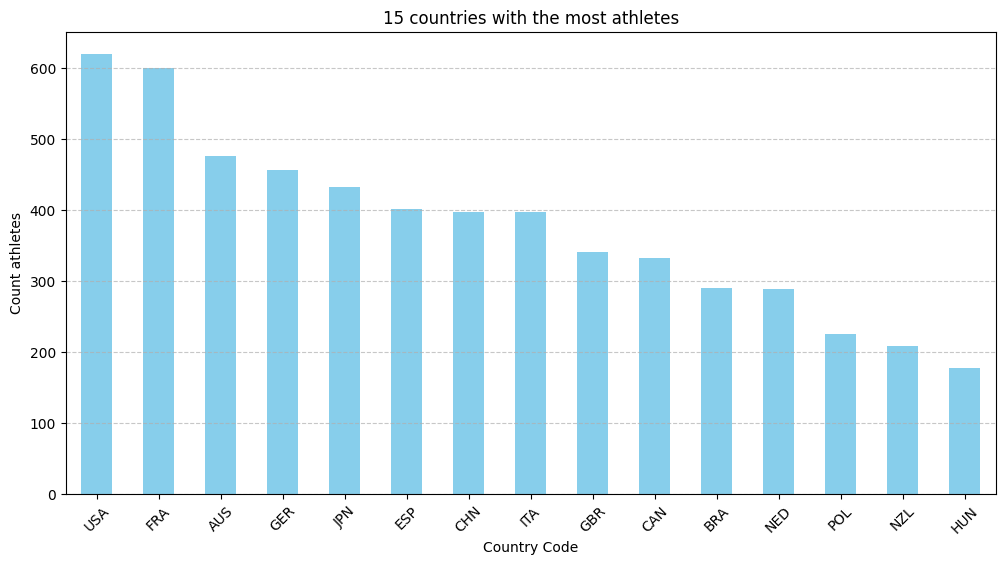

In [98]:
plt.figure(figsize=(12, 6))
count_athletes2.head(15).plot(kind='bar', color='skyblue')
plt.xlabel('Country Code')
plt.ylabel('Count athletes')
plt.title('15 countries with the most athletes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Сколько женщин и мужчин участвовало в Олимпиаде?

In [99]:
data['gender'].value_counts()

,count
gender,
Male,5655
Female,5460


Выведите количество женщин, которые участвовали только в одной соревновательной группе (колонка events).

In [101]:
female_single_event = data[(data['gender'] == 'Female') & (data['events'].str.count(',') == 0)]
print(f"Count of female with single event: {len(female_single_event)}")

Count of female with single event: 4265


Выведите количество спортсменов, у которых национальность не совпадает со страной, за которую они выступают.

In [103]:
national_not_country = data[data['nationality_code'] != data['country_code']]
print(f"Count of athletes whose nationality does not match the country: {len(national_not_country)}")

Count of athletes whose nationality does not match the country: 203


Какой процент мужчин моложе 23 участвовало в этой Олимпиаде?

In [105]:
data['birth_date'] = pd.to_datetime(data['birth_date'])
data['age'] = (pd.to_datetime('2024-08-11') - data['birth_date']).dt.total_seconds() / (365.25 * 24 * 60 * 60)
male_under23 = data[(data['gender'] == 'Male') & (data['age'] < 23)]
print(f"Male under 23: {((male_under23['name'].count() / data[data['gender'] == 'Male']['name'].count()) * 100):.2f}%")

Male under 23: 20.35%


Постройте график зависимости роста от веса у женщин (scatter plot).

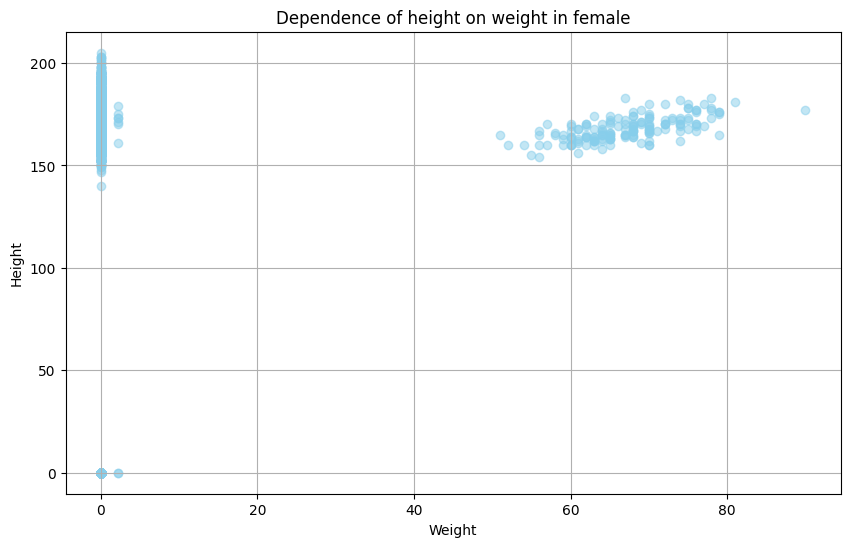

In [106]:
female = data[data['gender'] == 'Female']

plt.figure(figsize=(10, 6))
plt.scatter(female['weight'], female['height'], alpha=0.5, color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Dependence of height on weight in female')
plt.grid(True)
plt.show()

Постройте график распределения, где по оси X будет показан возраст, а по оси Y - процент спортсменов этого возраста, принявших участие в Олимпиаде для женщин и мужчин на одном графике.

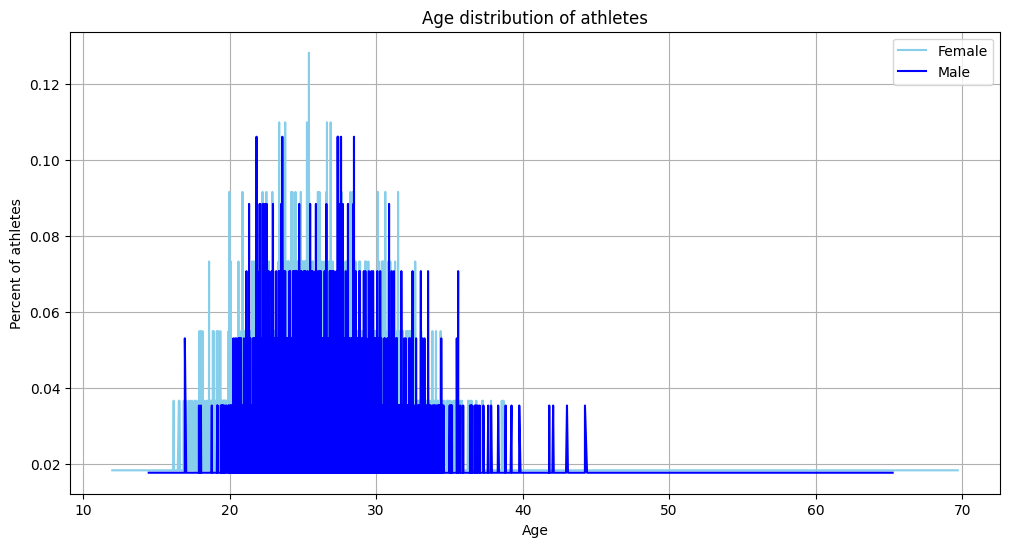

In [107]:
male = data[data['gender'] == 'Male']
female_age_percent = (female['age'].value_counts().sort_index() / len(female)) * 100
male_age_percent = (male['age'].value_counts().sort_index() / len(male)) * 100

plt.figure(figsize=(12, 6))
plt.plot(female_age_percent.index, female_age_percent.values, label='Female', color='skyblue')
plt.plot(male_age_percent.index, male_age_percent.values, label='Male', color='blue')
plt.xlabel('Age')
plt.ylabel('Percent of athletes')
plt.title('Age distribution of athletes')
plt.legend()
plt.grid(True)
plt.show()

Постройте круговую диаграмму, чтобы отобразить долю спортсменов по пяти странам с наибольшим количеством участников.

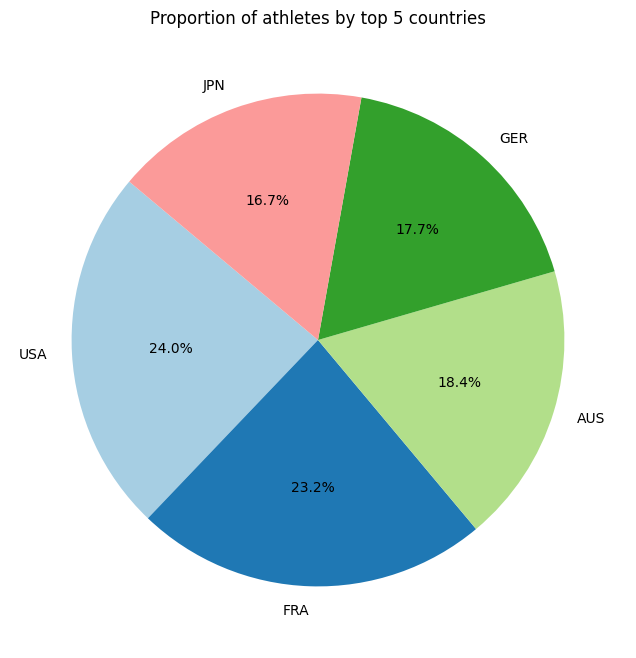

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(count_athletes2.head(5), labels=count_athletes2.head(5).index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of athletes by top 5 countries')
plt.show()